In [36]:
import pandas as pd
import os

def extract_sample(column_name):
    """
    Extracts sample type from the given column name.
    
    Args:
    - column_name (str): Name of the column
    
    Returns:
    - str: sample_type
    """
    sample_start = "DOD" if "DOD" in column_name else "M"
    sample_end = "5xFAD" if "5xFAD" in column_name else "WT"
    sample_type = column_name[column_name.index(sample_start): column_name.index(sample_end) + len(sample_end)]
    
    return sample_type

def extract_brain_region_from_filename(filename):
    """
    Extracts brain region from the given filename.
    
    Args:
    - filename (str): Name of the file
    
    Returns:
    - str: brain_region
    """
    brain_regions = ["cerebellum", "cortex", "diencephalon", "hippo"]
    
    for region in brain_regions:
        if region in filename:
            return region

def process_csv_to_dataframe(directory='.'):
    """
    Process all CSV files in a given directory and return a DataFrame with desired columns.
    
    Args:
    - directory (str): Path to the directory. Defaults to the current directory.
    q()
    Returns:
    - df: DataFrame with columns ["Filename", "Sample", "Brain Region", "Intensity", "Lipid"]
    """
    all_data = []
    
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            df = pd.read_csv(file)
            df = df[df['FDR'] <= 0.1]
            brain_region = extract_brain_region_from_filename(file)
            
            for col in df.columns:
                if 'DOD' in col or 'FAD' in col:
                    sample_type = extract_sample(col)
                    for index, row in df.iterrows():
                        intensity = row[col]
                        lipid_name = row['lipid']  # Assuming the column name for lipids is "Lipid"
                        all_data.append([file, sample_type, brain_region, intensity, lipid_name])
    
    return pd.DataFrame(all_data, columns=["Filename", "Sample", "Brain Region", "Intensity", "Lipid"])

# Get the resulting DataFrame
results_df = process_csv_to_dataframe()
results_df.head(None)


,Filename,Sample,Brain Region,Intensity,Lipid
0,diencephalon.csv,DOD100-M2-5xFAD,diencephalon,1.420614e+04,C24:6
1,diencephalon.csv,DOD100-M2-5xFAD,diencephalon,4.006962e+06,22:3 Campesteryl ester
2,diencephalon.csv,DOD100-M2-5xFAD,diencephalon,3.415261e+06,22:2 Campesteryl ester
3,diencephalon.csv,DOD100-M2-5xFAD,diencephalon,4.193570e+06,"22:0 Cholesteryl ester, 20:0 Sitosteryl ester"
4,diencephalon.csv,DOD100-M2-5xFAD,diencephalon,4.263196e+06,"22:1 Cholesteryl ester, 20:0 Stigmasteryl este..."
...,...,...,...,...,...
98,cerebellum.csv,M1FAD173-5xFAD,cerebellum,4.775112e+04,C24:6
99,cerebellum.csv,M2FAD173-5xFAD,cerebellum,9.621361e+03,C24:6
100,cerebellum.csv,DOD100-M1-WT,cerebellum,1.056120e+04,C24:6
101,cerebellum.csv,DOD99-M2-WT,cerebellum,1.326378e+04,C24:6


In [44]:
# Group by 'Lipid', 'Brain Region', and 'Sample', then sum the 'Intensity'
aggregated = results_df.groupby(['Lipid', 'Brain Region', 'Sample']).Intensity.sum().reset_index()

# Pivot the aggregated data
df2 = aggregated.pivot_table(index=['Lipid', 'Brain Region'], columns='Sample', values='Intensity', aggfunc=sum)
df2.reset_index(inplace=True)

df2.head(None)



Sample,Lipid,Brain Region,DOD100-M1-WT,DOD100-M2-5xFAD,DOD100-M3-5xFAD,DOD99-M1-5xFAD,DOD99-M2-WT,M1FAD173-5xFAD,M2FAD173-5xFAD,M5FAD173-WT
0,"22:0 Cholesteryl ester, 20:0 Sitosteryl ester",diencephalon,4.915732e+05,4.193570e+06,2.436226e+06,1.227539e+06,408879.084427,487762.711960,245699.797661,132412.489822
1,"22:1 Cholesteryl ester, 20:0 Stigmasteryl este...",diencephalon,4.837083e+05,4.263196e+06,2.450400e+06,1.237139e+06,420318.227287,480094.975399,260850.219124,128342.928688
2,22:2 Campesteryl ester,diencephalon,3.660851e+05,3.415261e+06,1.941419e+06,9.509638e+05,299380.281021,341881.021420,226201.935867,109228.788609
3,22:3 Campesteryl ester,diencephalon,4.276439e+05,4.006962e+06,2.313333e+06,1.145395e+06,345265.186508,463608.853676,215819.472416,99418.786957
4,C24:6,cerebellum,1.056120e+04,1.232640e+04,1.007766e+04,1.403054e+04,13263.780952,47751.123383,9621.360603,272243.063175
5,C24:6,cortex,1.448160e+04,1.472492e+04,NaN,1.344236e+04,14948.381107,59095.504204,10546.140739,354402.948135
6,C24:6,diencephalon,1.441326e+04,1.420614e+04,1.129728e+04,1.301044e+04,13877.681026,47410.363144,12029.120834,415605.287918
7,C24:6,hippo,1.326978e+04,1.455508e+04,1.304648e+04,1.262304e+04,13179.320930,47890.763412,9405.680634,258853.240379
8,"Cholesteryl 11-hydroperoxy-eicosatetraenoate, ...",diencephalon,5.087194e+05,4.335094e+06,2.424601e+06,1.214155e+06,431463.231598,473240.092957,260224.897327,140062.050373
9,PG (32:5),hippo,1.390551e+06,2.872336e+04,6.701154e+04,2.490314e+04,58263.664001,50010.763550,53159.364105,52151.984253


In [85]:

# Melting the dataframe
melted_df = df2.melt(id_vars=['Lipid', 'Brain Region'], 
                     value_vars=[col for col in df2.columns if col not in ['Lipid', 'Brain Region']],
                     var_name='Sample', 
                     value_name='Intensity')

print(melted_df['Sample'].unique())

melted_df.head(None)

['DOD100-M1-WT' 'DOD100-M2-5xFAD' 'DOD100-M3-5xFAD' 'DOD99-M1-5xFAD'
 'DOD99-M2-WT' 'M1FAD173-5xFAD' 'M2FAD173-5xFAD' 'M5FAD173-WT']


,Lipid,Brain Region,Sample,Intensity
0,"22:0 Cholesteryl ester, 20:0 Sitosteryl ester",diencephalon,DOD100-M1-WT,491573.231598
1,"22:1 Cholesteryl ester, 20:0 Stigmasteryl este...",diencephalon,DOD100-M1-WT,483708.253937
2,22:2 Campesteryl ester,diencephalon,DOD100-M1-WT,366085.064606
3,22:3 Campesteryl ester,diencephalon,DOD100-M1-WT,427643.908478
4,C24:6,cerebellum,DOD100-M1-WT,10561.200748
...,...,...,...,...
99,"Cholesteryl 11-hydroperoxy-eicosatetraenoate, ...",diencephalon,M5FAD173-WT,140062.050373
100,PG (32:5),hippo,M5FAD173-WT,52151.984253
101,PS (32:5),diencephalon,M5FAD173-WT,56235.723724
102,PS (32:5),hippo,M5FAD173-WT,46853.883240


In [88]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

# Unique samples
samples = melted_df['Sample'].unique()
for sample in samples:
    # Subset the dataframe based on the sample
    df_sample = melted_df[melted_df['Sample'] == sample]
    
    # Prepare data for PCA
    X = df_sample.pivot(index='Lipid', columns='Brain Region', values='Intensity')
    X = X.fillna(0)
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X_scaled)
    
    # Convert PCA results to a DataFrame
    principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
    
    # Plotting
    fig = px.scatter(principalDf, x='PC1', y='PC2', hover_name=df_sample['Lipid'].values,
                     title=f'PCA of Lipid Intensities for {sample}')
    explained_var = pca.explained_variance_ratio_
    fig.update_xaxes(title=f"PC1 ({explained_var[0]*100:.2f}%)")
    fig.update_yaxes(title=f"PC2 ({explained_var[1]*100:.2f}%)")
    
    fig.show()

ValueError: All arguments should have the same length. The length of argument `hover_name` is 13, whereas the length of  previously-processed arguments ['PC1', 'PC2'] is 9

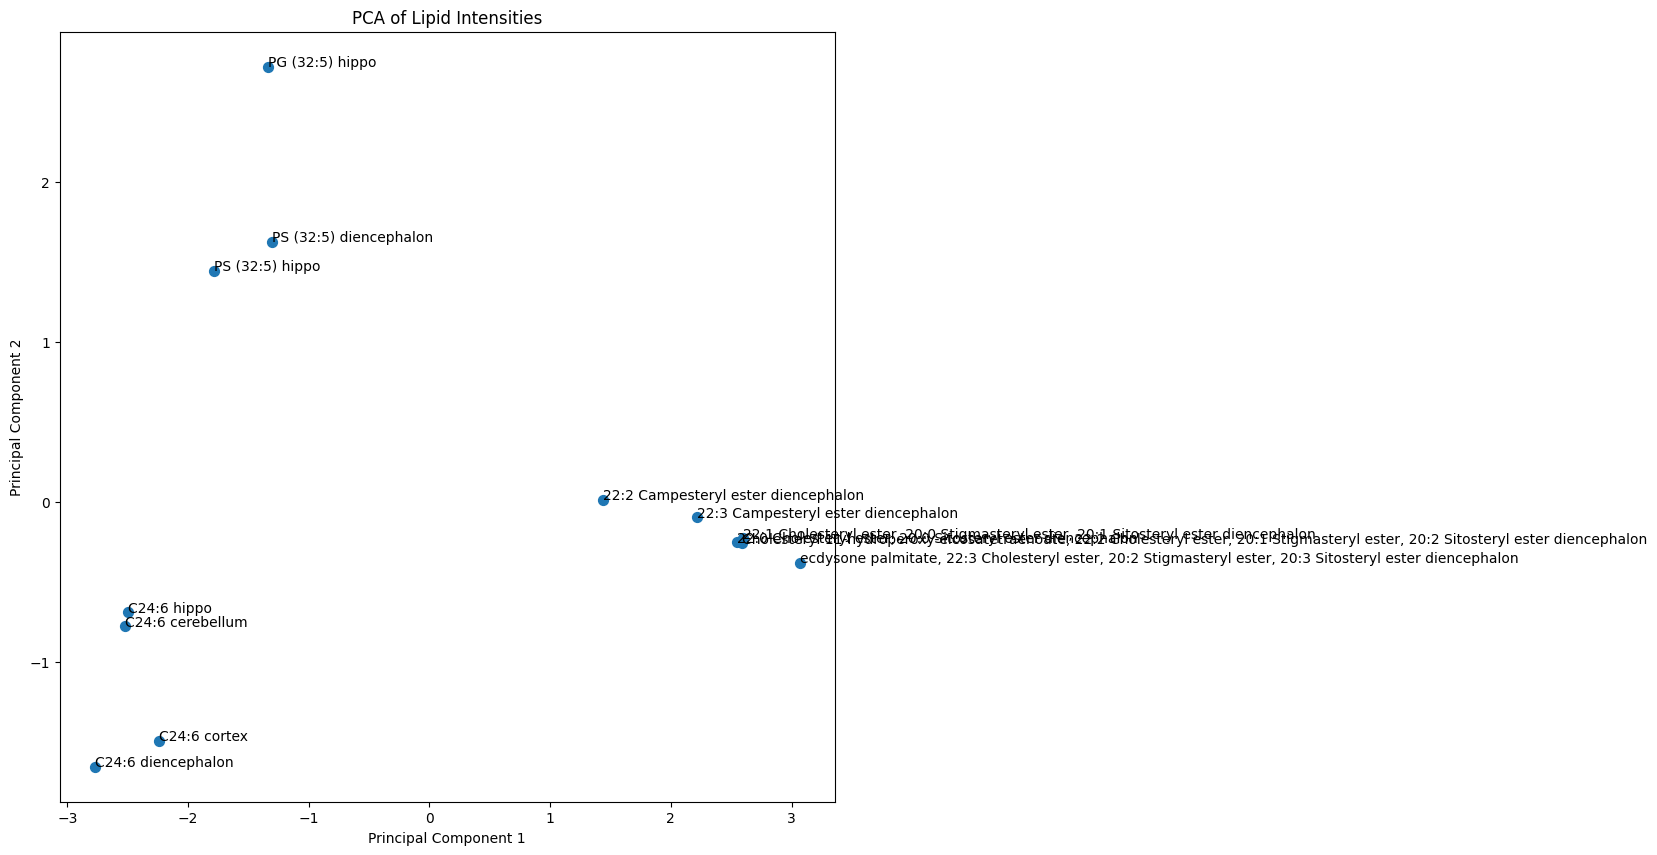

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Drop non-numeric columns to isolate the data matrix
X = df2.drop(['Lipid', 'Brain Region'], axis=1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute NaN values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_scaled)

# Perform PCA
pca = PCA(n_components=2)  # We'll visualize the first two principal components
principalComponents = pca.fit_transform(X_imputed)

# Convert the principal components to a dataframe
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Combine with the lipid and brain region for plotting
finalDf = pd.concat([principalDf, df2[['Lipid', 'Brain Region']]], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(finalDf['PC1'], finalDf['PC2'], s=50)

# Label each point with its lipid and brain region
for i, txt in enumerate(finalDf['Lipid'] + " " + finalDf['Brain Region']):
    ax.annotate(txt, (finalDf['PC1'][i], finalDf['PC2'][i]))

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Lipid Intensities')
plt.show()


In [80]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import plotly.express as px

# Assuming df2 is your data
# Drop non-numeric columns to isolate the data matrix
X = df2.drop(['Lipid', 'Brain Region'], axis=1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute NaN values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_scaled)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_imputed)

# Convert the principal components to a dataframe
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Combine with the lipid and brain region for plotting
finalDf = pd.concat([principalDf, df2[['Lipid', 'Brain Region']]], axis=1)
explained_var = pca.explained_variance_ratio_

fig = px.scatter(finalDf, 
                 x='PC1', 
                 y='PC2', 
                 hover_name=finalDf['Lipid'] + " " + finalDf['Brain Region'],
                 title='PCA of Lipid Intensities',
                 labels={
                     "PC1": f"PC1 ({explained_var[0]*100:.2f}%)",
                     "PC2": f"PC2 ({explained_var[1]*100:.2f}%)"
                 },
                 )  # ensure the size reflects the value you set)



print(explained_var)
# Annotations for x and y axes
annotations = [
    dict(xref='paper', yref='paper', x=0.0, y=-0.2,
         xanchor='left', yanchor='top',
         text=f"PC1{explained_var[0]*100:.2f}%",
         font=dict(size=15),
         showarrow=False),
    
    dict(xref='paper', yref='paper', x=-0.15, y=1.02,
         xanchor='right', yanchor='bottom',
         text=f"PC2{explained_var[1]*100:.2f}%",
         font=dict(size=15),
         showarrow=False)
]
fig.update_traces(marker={'size': 8})
fig.update_layout(annotations=annotations, hovermode="closest",
                title_font_size=32,  # Increase the main title font size
                  yaxis_title_font=dict(size=24),  # Increase y-axis title font size
                  xaxis_title_font=dict(size=24),   # Increase x-axis title font size
                  width=1000,
                  height=600,
                  legend_title_font=dict(size=24),
                  legend_font=dict(size=20),
                  title_x = 0.5,  # Center the main title
                 
)
fig.update_yaxes(tickfont=dict(family="Arial Black", size=16))  
fig.update_xaxes(tickfont=dict(family="Arial Black", size=16))  
fig.show()


[0.66266001 0.17949471]


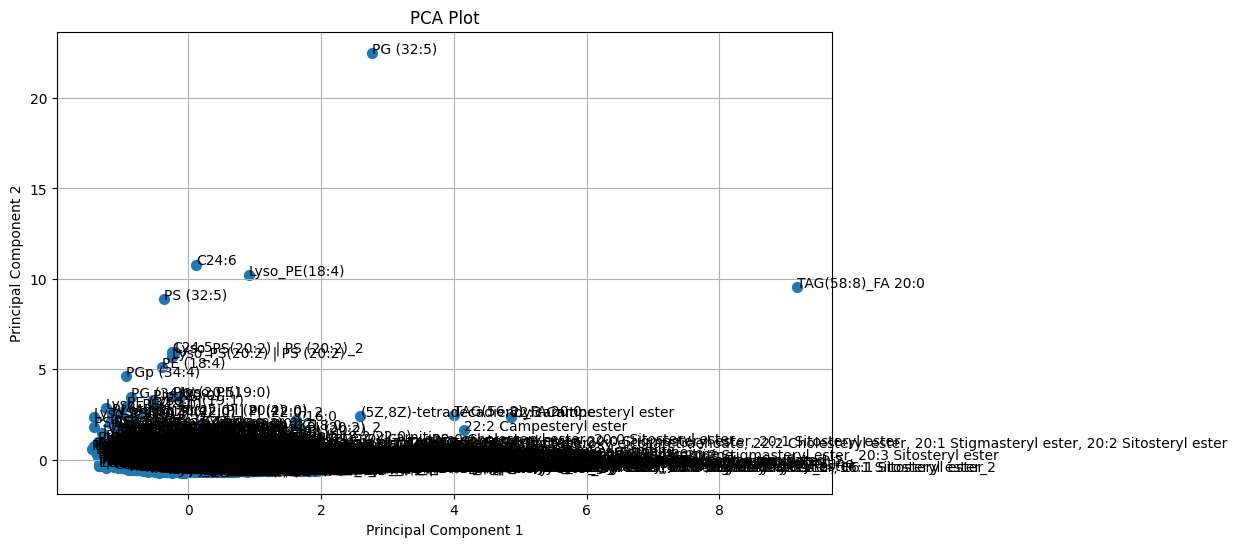

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Simulated data based on your example (replace this with reading the actual CSV file)
data = pd.read_csv('github/lipids/Lipidomics/lipid_platform/tools/PCA/Genotype_ 5xFAD__Brain Region_ cerebellum vs Genotype_ WT__Brain Region_ cerebellum19Aug2023_full.csv')
df = pd.DataFrame(data)

# Select only the numeric columns for PCA
numeric_data = df[['logFC', 'logCPM', 'LR']]

# Standardize the data (mean=0, variance=1), which is a common practice before PCA
scaled_data = StandardScaler().fit_transform(numeric_data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convert the principal components to a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the PCA results
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=50)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# If you want to annotate points with lipid names
for i, lipid in enumerate(df['lipid']):
    plt.annotate(lipid, (pca_df['PC1'][i], pca_df['PC2'][i]))

plt.grid()
plt.show()


In [22]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Read the data from the CSV file

data = pd.read_csv('edgeR_results.csv')
df = pd.DataFrame(data)

# Select only the numeric columns for PCA
numeric_data = df[['logFC', 'logCPM', 'LR']]

# Standardize the data (mean=0, variance=1), which is a common practice before PCA
scaled_data = StandardScaler().fit_transform(numeric_data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convert the principal components to a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Create the PCA plot using Plotly
fig = go.Figure(data=go.Scatter(x=pca_df['PC1'], 
                                y=pca_df['PC2'], 
                                mode='markers',
                                marker=dict(size=5),
                                ))
# Update figure properties if needed
fig.update_layout(title='PCA Plot',
                  xaxis_title=f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)',
                  yaxis_title=f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)',
                title_x=0.5,
                title_font_size=32,  # Increase the main title font size
                yaxis_title_font=dict(size=20),  # Increase y-axis title font size
                xaxis_title_font=dict(size=20),   # Increase x-axis title font size
                width=1000,
                height=600)  # Adjust the size of markers

# Show the plot
fig.show()
